# HOTEL HR PEOPLE ANALYTICS

### Hotel Analysis from a People Analytics perspective.
<p>This project will try to emulate HR analytics to continue practicing my analytical skills. Also, with this project, I want to <u>strengthen my knowledge</u> in <b><i>MySql</b></i> <b><i>and SQL</i></b>. I will use <b><i>Python</i></b> and <b><i>Power BI</i></b> for the data analysis.</p>
<p>I will start with doing a little of data engineering to design the databases I am going to work with. I will use <b><i>Figma</i></b> to draft the databases and the relationships between each other. Then I will fill the databases with the data, and later I will start the data analysis.</p>

### 1. Import libraries

In [1]:
# Libraries to manipulate the data
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import random
import string
from app_pass import dbpass

# Library to deploy charts with the data
import seaborn as sns
import matplotlib.pyplot as plt

# Statmodels for predictions
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Connect to our MySQL database
import mysql.connector
from sqlalchemy import create_engine


# This is to ignore warnings.
import warnings
warnings.filterwarnings('ignore')

### 2. Working with our databases

<p>Previously, I created the databases I was going to work with. Because part of the data was difficult to create randomly, I downloaded the databases into an <i>.xlsx</i> file and worked with it.</p>

<p>I called the file <b><i>hotel_hranalytics.xlsx</i></b>, so now it's time to start working with it.</p>

In [2]:
# Let's load our databases
df_rawemp = pd.read_excel('../hotel_hranalytics/hotel_hranalytics.xlsx', sheet_name='Employees', converters={'emp_id':str})

df_rawemp.head()

,emp_id,Name,Surname,Birthday,Age,Gender,on_license,hotel_id
0,3272,James,Smith,1957-08-09,67,M,0,FUESSP
1,3074,John,Johnson,1981-11-19,42,M,0,FUESSP
2,6627,Robert,Williams,1983-10-15,41,M,0,FUESSP
3,420,Michael,Brown,1976-04-05,48,M,0,FUESSP
4,4856,William,Jones,1968-11-20,55,M,0,FUESSP


In [3]:
df_rawht = pd.read_excel('../hotel_hranalytics/hotel_hranalytics.xlsx', sheet_name='Hotels')

df_rawht.head()

,hotel_id,Name,Location,Opening,Stars,Budget
0,FUESSP,Sandy Shores Park,28 03 18.9N-14 19 21.4W,2001-03-05,4,350000000
1,TFNOBH,Ocean Breeze Haven,28 05 56.5N-16 44 54.6W,1998-10-05,5,550000000
2,ACECWR,Coral Wave Resort,28 51 25.9N-13 47 48.7 W,2000-05-05,5,480000000


In [4]:
df_rawhtcomp = pd.read_excel('../hotel_hranalytics/hotel_hranalytics.xlsx', sheet_name='Hotel_Composition')

df_rawhtcomp.head()

,hc_id,Department,Active_employees,Emp_with_license,Total_employees,hotel_id
0,REFUESSP,Reception_Reservations,11,1,12,FUESSP
1,FLFUESSP,Floors_Laundry,35,3,38,FUESSP
2,KIFUESSP,Kitchen,35,3,38,FUESSP
3,BAFUESSP,Bar_Restaurant,31,7,38,FUESSP
4,ANFUESSP,Animation,11,1,12,FUESSP


In [5]:
df_rawempwages = pd.read_excel('../hotel_hranalytics/hotel_hranalytics.xlsx', sheet_name='Employees_wages')

df_rawempwages.head()

,emp_wag_id,Price_$_Hour,Hours_worked,Work_overtime,Ovh$_75%,Gross_pay,Deductions_3%,Total_Payment,emp_id,hotel_id,hc_id,Payment_date
0,3272REFUESSP,14,129,4,10.50,1848.00,55.4400,1792.5600,3272,FUESSP,REFUESSP,2024-01-29
1,3074REFUESSP,14,143,3,10.50,2033.50,61.0050,1972.4950,3074,FUESSP,REFUESSP,2024-01-29
2,6627REFUESSP,18,135,4,13.50,2484.00,74.5200,2409.4800,6627,FUESSP,REFUESSP,2024-01-29
3,420REFUESSP,19,121,11,14.25,2455.75,73.6725,2382.0775,420,FUESSP,REFUESSP,2024-01-29
4,4856REFUESSP,14,132,7,10.50,1921.50,57.6450,1863.8550,4856,FUESSP,REFUESSP,2024-01-29


In [6]:
df_rawworkforce = pd.read_excel('../hotel_hranalytics/hotel_hranalytics.xlsx', sheet_name='Workforce_Composition')

df_rawworkforce.head()

,wkc_id,Department,Position,years_at_position,Entry_date,years_working,Staff,emp_id,hotel_id,hc_id
0,3272FUESSP,Reception_Reservations,Staff,1,2023-09-26,1,0,3272,FUESSP,REFUESSP
1,3074FUESSP,Reception_Reservations,Staff,1,2023-04-29,1,0,3074,FUESSP,REFUESSP
2,6627FUESSP,Reception_Reservations,3rd_Command,4,2014-01-17,10,7,6627,FUESSP,REFUESSP
3,420FUESSP,Reception_Reservations,3rd_Command,3,2012-10-25,12,7,420,FUESSP,REFUESSP
4,4856FUESSP,Reception_Reservations,Staff,1,2023-06-18,1,0,4856,FUESSP,REFUESSP


In [7]:
# If I needed let's put all together
df_combined = pd.concat([df_rawemp, df_rawht, df_rawhtcomp, df_rawworkforce, df_rawempwages])

df_combined.dtypes

emp_id                       object
Name                         object
Surname                      object
Birthday             datetime64[ns]
Age                         float64
Gender                       object
on_license                  float64
hotel_id                     object
Location                     object
Opening                      object
Stars                       float64
Budget                      float64
hc_id                        object
Department                   object
Active_employees            float64
Emp_with_license            float64
Total_employees             float64
wkc_id                       object
Position                     object
years_at_position           float64
Entry_date           datetime64[ns]
years_working               float64
Staff                       float64
emp_wag_id                   object
Price_$_Hour                float64
Hours_worked                float64
Work_overtime               float64
Ovh$_75%                    

In [8]:
# Employees Table
df_rawemp[['Age', 'on_license']].apply(pd.to_numeric)
df_rawemp[['hotel_id']].astype('str')

# Hotels Table
df_rawht['Stars'].apply(pd.to_numeric)
df_rawht[['hotel_id']].astype('str')
df_rawht.rename(columns={'Stars': 'Stars_type'}, inplace=True)

# Hotel Composition Table
df_rawhtcomp[['Active_employees', 'Emp_with_license', 'Total_employees']].apply(pd.to_numeric)
df_rawhtcomp[['hc_id', 'hotel_id']].astype('str')

# Workforce Composition Table
df_rawworkforce[['years_at_position', 'years_working', 'Staff']].apply(pd.to_numeric)
df_rawworkforce[['wkc_id', 'emp_id', 'hotel_id', 'hc_id']].astype('str')

# Employees Wages Table
df_rawempwages[['emp_wag_id', 'emp_id', 'hotel_id',	'hc_id']].astype('str')
df_rawempwages[['Price_$_Hour']].apply(pd.to_numeric)
df_rawempwages.rename(columns={'Ovh$_75%': 'Ovh$_75', 'Deductions_3%': 'Deductions_3'}, inplace=True)

df_rawemp.dtypes

emp_id                object
Name                  object
Surname               object
Birthday      datetime64[ns]
Age                    int64
Gender                object
on_license             int64
hotel_id              object
dtype: object

In [9]:
df_rawhtcomp.dtypes

hc_id               object
Department          object
Active_employees     int64
Emp_with_license     int64
Total_employees      int64
hotel_id            object
dtype: object

In [10]:
df_rawworkforce = df_rawworkforce.rename(columns={'Position': 'Positions'})
df_rawworkforce.dtypes


wkc_id                       object
Department                   object
Positions                    object
years_at_position             int64
Entry_date           datetime64[ns]
years_working                 int64
Staff                         int64
emp_id                        int64
hotel_id                     object
hc_id                        object
dtype: object

In [11]:
df_rawempwages.dtypes

emp_wag_id               object
Price_$_Hour              int64
Hours_worked              int64
Work_overtime             int64
Ovh$_75                 float64
Gross_pay               float64
Deductions_3            float64
Total_Payment           float64
emp_id                    int64
hotel_id                 object
hc_id                    object
Payment_date     datetime64[ns]
dtype: object

<h3>Let's let the power of visualizations release the beauty of our data.</h3>

<p>Let's begin with something simple. How are our employees distributed by gender?</p>
<p>To answer this question we will use the <i>Employees</i> table.</p>

In [12]:
#First we let's check for missing values
missing_values = df_rawemp.isnull().sum()
print('Number of missing values: ', missing_values)

Number of missing values:  emp_id        0
Name          0
Surname       0
Birthday      0
Age           0
Gender        0
on_license    0
hotel_id      0
dtype: int64


In [13]:
# Let's work with the gender column but firs let's create a variable with the lenght of our database
emp_length = len(df_rawemp)
print('The total of registries we have at the Employees table is: ', emp_length)


The total of registries we have at the Employees table is:  505


In [14]:
# Gender
emp_gender = df_rawemp['Gender'].value_counts()
print(emp_gender)

Gender
M    267
F    238
Name: count, dtype: int64


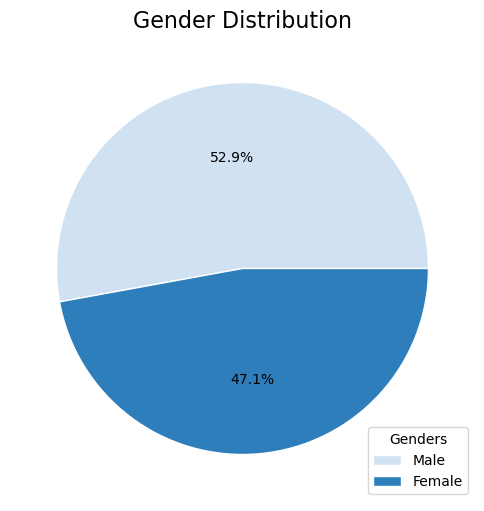

In [15]:
# To visualize the gender distribution I will use a pie chart

# Preparing the data
colors = plt.get_cmap('Blues')(np.linspace(0.2, 0.7, len(emp_gender)))
labels = 'Male', 'Female'

# Creating the PIE CHART
fig, ax = plt.subplots(figsize=(6, 8))
ax.pie(emp_gender, colors=colors, autopct='%1.1f%%', center=(4, 4), wedgeprops={"linewidth": 1, "edgecolor": "white"})
ax.legend(labels, loc='lower right', title='Genders')
ax.set_title('Gender Distribution', fontsize=16)

plt.show()

Text(0.5, 1.0, 'Age Distribution')

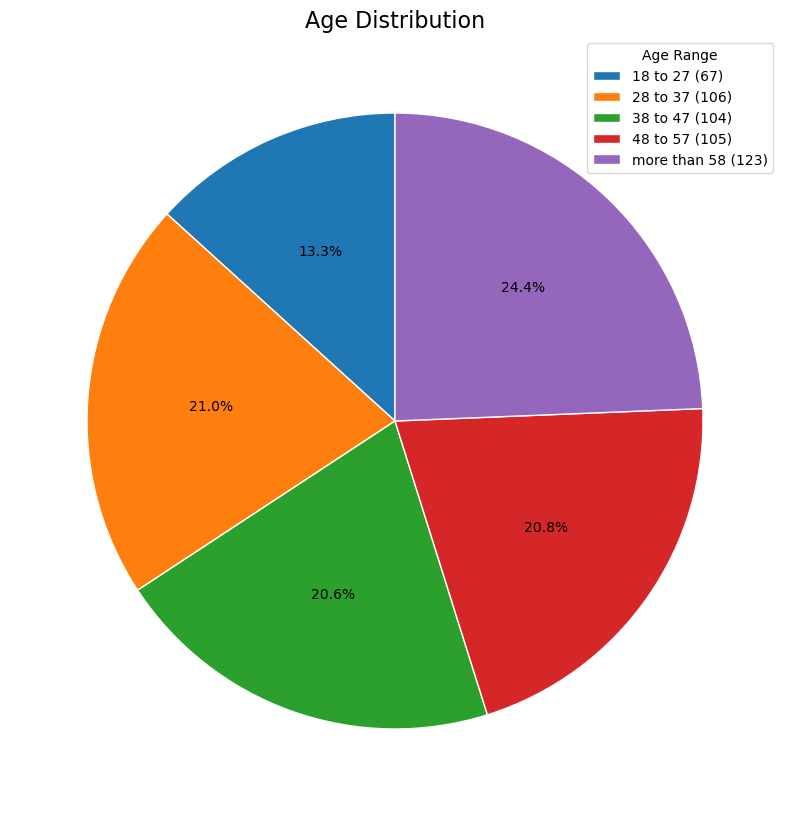

In [16]:
#Age range

def age_range(age):
    if age >= 18 and age <= 27:
        return '18 to 27'
    elif age >= 28 and age <= 37:
        return '28 to 37'
    elif age >= 38 and age <= 47:
        return '38 to 47'
    elif age >= 48 and age <= 57:
        return '48 to 57'
    else:
        return 'more than 58'
    
emp_age_range = df_rawemp['Age'].apply(lambda x: pd.Series(age_range(x)))

df_rawemp['Age_range'] = emp_age_range

# Let's check the distribution of the age range
age_range_count = df_rawemp['Age_range'].value_counts().sort_index()
total_agerange_count = age_range_count.sum()
percentage = (age_range_count / total_agerange_count) * 100

fig, ax = plt.subplots(figsize=(12, 10))

labels = [f'{age} ({count})' for age, count in zip(age_range_count.index, age_range_count)]
labels_sort = df_rawemp['Age_range'].value_counts().sort_index()
graph_labels = '18 to 27', '28 to 37', '38 to 47', '48 to 57', 'more than 58'
# print(labels_sort)

ax.pie(age_range_count, autopct='%1.1f%%', center=(4, 4), wedgeprops={"linewidth": 1, "edgecolor": "white"}, startangle=90)

plt.legend(labels, loc='upper right', title='Age Range')

ax.set_title('Age Distribution', fontsize=16)



Age_range  18 to 27  28 to 37  38 to 47  48 to 57  more than 58
hotel_id                                                       
ACECWR           17        31        43        38            36
FUESSP           24        35        29        32            46
TFNOBH           26        40        32        35            41


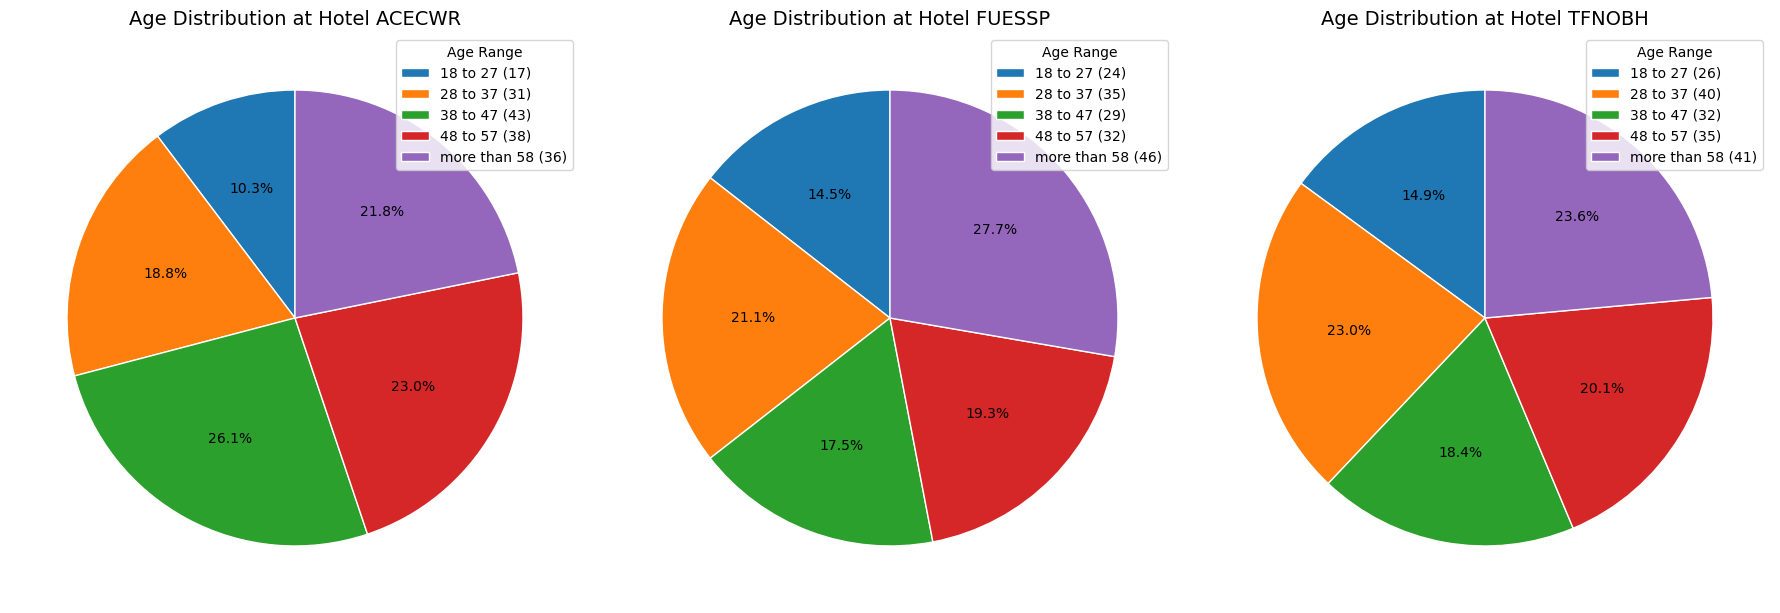

In [17]:
# Age distribution by hotels
agerange_by_hotel = df_rawemp.groupby(['hotel_id', 'Age_range']).size().unstack()
print(agerange_by_hotel)

fig, axs = plt.subplots(1, 3, figsize=(18, 6))

for i, hotel in enumerate(agerange_by_hotel.index):
    ax = axs[i]
    labelsbyhotel = [f'{age} ({count})' for age, count in zip(age_range_count.index, agerange_by_hotel.loc[hotel])]
    ax.pie(agerange_by_hotel.loc[hotel], autopct='%1.1f%%', center=(4, 4), wedgeprops={"linewidth": 1, "edgecolor": "white"}, startangle=90)
    ax.set_title(f'Age Distribution at Hotel {hotel}', fontsize=14)
    ax.legend(labelsbyhotel, loc='upper right', title='Age Range')

plt.tight_layout()
plt.show()

on_license
0    432
1     73
Name: count, dtype: int64


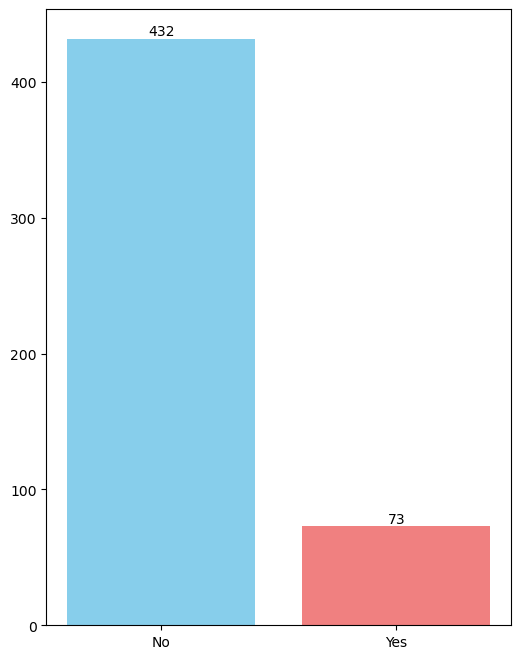

In [18]:
on_license_count = df_rawemp['on_license'].value_counts()
print(on_license_count)

fig, ax = plt.subplots(figsize=(6, 8))

labels = 'No', 'Yes'
colors = 'skyblue', 'lightcoral'

ax.bar(labels, on_license_count, color=colors)
ax.bar_label(ax.containers[0], fontsize=10)

plt.show()

on_license    0   1
hotel_id           
ACECWR      137  28
FUESSP      148  18
TFNOBH      147  27


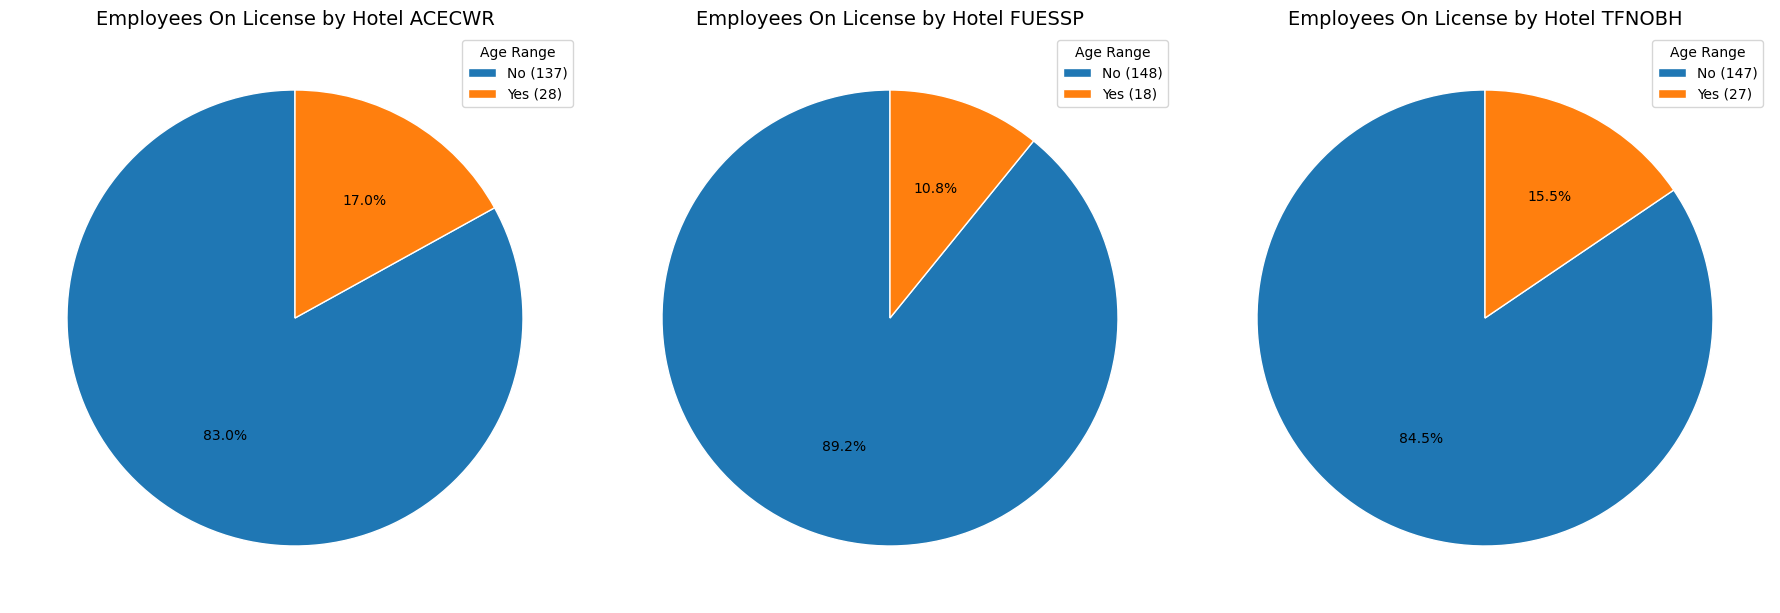

In [19]:
onlicense_by_hotel = df_rawemp.groupby(['hotel_id', 'on_license']).size().unstack()
print(onlicense_by_hotel)

fix, axs = plt.subplots(1, 3, figsize=(18, 6))
labels_onlicense = 'No', 'Yes'

for i, hotel in enumerate(onlicense_by_hotel.index):
    ax = axs[i]
    labels2 = [f'{age} ({count})' for age, count in zip(labels_onlicense, onlicense_by_hotel.loc[hotel])]
    ax.pie(onlicense_by_hotel.loc[hotel], autopct='%1.1f%%', center=(4, 4), wedgeprops={"linewidth": 1, "edgecolor": "white"}, startangle=90)
    ax.set_title(f'Employees On License by Hotel {hotel}', fontsize=14)
    ax.legend(labels2, loc='upper right', title='Age Range')

plt.tight_layout()
plt.show()

In [25]:
# Let's work with the employees wages table
# First let merge the workforce composition table with the employees wages table for a better analysis
emp_wages_wfc = pd.merge(df_rawempwages, df_rawworkforce, on='emp_id', how='inner')
emp_wages_wfc.head()

,emp_wag_id,Price_$_Hour,Hours_worked,Work_overtime,Ovh$_75,Gross_pay,Deductions_3,Total_Payment,emp_id,hotel_id_x,...,Payment_date,wkc_id,Department,Positions,years_at_position,Entry_date,years_working,Staff,hotel_id_y,hc_id_y
0,3272REFUESSP,14,129,4,10.50,1848.00,55.4400,1792.5600,3272,FUESSP,...,2024-01-29,3272FUESSP,Reception_Reservations,Staff,1,2023-09-26,1,0,FUESSP,REFUESSP
1,3074REFUESSP,14,143,3,10.50,2033.50,61.0050,1972.4950,3074,FUESSP,...,2024-01-29,3074FUESSP,Reception_Reservations,Staff,1,2023-04-29,1,0,FUESSP,REFUESSP
2,6627REFUESSP,18,135,4,13.50,2484.00,74.5200,2409.4800,6627,FUESSP,...,2024-01-29,6627FUESSP,Reception_Reservations,3rd_Command,4,2014-01-17,10,7,FUESSP,REFUESSP
3,420REFUESSP,19,121,11,14.25,2455.75,73.6725,2382.0775,420,FUESSP,...,2024-01-29,420FUESSP,Reception_Reservations,3rd_Command,3,2012-10-25,12,7,FUESSP,REFUESSP
4,4856REFUESSP,14,132,7,10.50,1921.50,57.6450,1863.8550,4856,FUESSP,...,2024-01-29,4856FUESSP,Reception_Reservations,Staff,1,2023-06-18,1,0,FUESSP,REFUESSP


In [27]:
emp_wages_wfc.drop(columns=['hotel_id_y', 'hc_id_y', 'wkc_id', 'years_at_position', 'Entry_date', 'years_working', 'Staff'], inplace=True)
emp_wages_wfc.head()

,emp_wag_id,Price_$_Hour,Hours_worked,Work_overtime,Ovh$_75,Gross_pay,Deductions_3,Total_Payment,emp_id,hotel_id_x,hc_id_x,Payment_date,Department,Positions
0,3272REFUESSP,14,129,4,10.50,1848.00,55.4400,1792.5600,3272,FUESSP,REFUESSP,2024-01-29,Reception_Reservations,Staff
1,3074REFUESSP,14,143,3,10.50,2033.50,61.0050,1972.4950,3074,FUESSP,REFUESSP,2024-01-29,Reception_Reservations,Staff
2,6627REFUESSP,18,135,4,13.50,2484.00,74.5200,2409.4800,6627,FUESSP,REFUESSP,2024-01-29,Reception_Reservations,3rd_Command
3,420REFUESSP,19,121,11,14.25,2455.75,73.6725,2382.0775,420,FUESSP,REFUESSP,2024-01-29,Reception_Reservations,3rd_Command
4,4856REFUESSP,14,132,7,10.50,1921.50,57.6450,1863.8550,4856,FUESSP,REFUESSP,2024-01-29,Reception_Reservations,Staff


In [28]:
new_missing_values = emp_wages_wfc.isnull().sum()
print('Number of missing values: ', new_missing_values)

Number of missing values:  emp_wag_id       0
Price_$_Hour     0
Hours_worked     0
Work_overtime    0
Ovh$_75          0
Gross_pay        0
Deductions_3     0
Total_Payment    0
emp_id           0
hotel_id_x       0
hc_id_x          0
Payment_date     0
Department       0
Positions        0
dtype: int64


<p>The data type is now corrected and transformed. It's time to upload the data into <b><i>"hrhotelpa"</i></b> that is what our database is called  in MySQL. I will use <i>Python</i> to upload all the data to their corresponding table. Remember we have created the tables using <i>PopSQL</i>.</p>

<p>Let's start working with <b>MySQL</b>. We are required to connect to MySQL and later create a cursor to work with the queries. </p>

In [21]:
# Let's create the connection to MySQL
try:
    
    db = mysql.connector.connect(
        host = "localhost",
        user = "root",
        password = dbpass
    )
    print("Connection established")
    # Creating the cursor to execute queries
    cursor = db.cursor()
    
except mysql.connector.Error as err:
    print("An error occurred: ", err)


Connection established


In [22]:
# Creating a enginge connection
hostname = "localhost"
database = "hrhotelpa"
username = "root"
password = dbpass

engine = create_engine("mysql+pymysql://{user}:{pw}@{host}/{db}".format(host=hostname, db=database, user=username, pw=password))

In [23]:
# Add the databases to MySQL
# df_rawht.to_sql('Hotels', engine, if_exists='append', index=False)
# df_rawemp.to_sql('Employees', engine, if_exists='append', index=False)
# df_rawhtcomp.to_sql('Hotel_Composition', engine, if_exists='append', index=False)
# df_rawworkforce.to_sql('Workforce_Composition', engine, if_exists='append', index=False)
# df_rawempwages.to_sql('Employees_Wages', engine, if_exists='append', index=False)

<p>Now... that all the data have been uploaded to our MySQL database, it's time to close our connection.</p>

In [24]:
cursor.close()
db.close()